In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.cm as cm
pd.set_option('max_colwidth', 400)

In [2]:
clean_country_df = pd.read_csv('Clean/cleaned_country_genres_data.csv')
clean_country_df.head()

,Country,Hip hop/Rap/R&b,EDM,Pop,Rock/Metal,Latin/Reggaeton,Other,Most Popular Genre
0,australia,31,15,65,17,0,8,Pop
1,canada,39,12,64,14,0,10,Pop
2,china,11,23,108,4,0,21,Pop
3,india,25,1,39,0,0,55,Pop
4,mexico,38,0,18,2,57,43,Latin/Reggaeton


In [3]:
clean_spotify_df = pd.read_csv('Clean/cleaned_spotify_data.csv')
clean_spotify_df.head()

,Title,Artist,Genre,Year,Bpm,Energy,Danceability,dB,Liveness,Valence,Duration (in seconds),Acousticness,Speechiness,Spotify Rating
0,#thatPOWER,will.i.am,Pop,2013,128,61,80,-6,7,40,280,0,6,68
1,(When You Gonna) Give It Up to Me (feat. Keyshia Cole) - Radio Version,Sean Paul,Pop,2006,96,76,71,-3,4,72,244,7,23,68
2,...Baby One More Time,Britney Spears,Pop,1999,93,70,76,-6,44,91,211,20,3,81
3,★,David Bowie,Rock/Metal,2016,98,53,36,-9,18,12,598,21,3,50
4,03' Bonnie & Clyde,JAY-Z,Hip hop/Rap/R&b,2002,90,68,76,-5,15,33,206,23,31,73


In [4]:
song_count = len(clean_spotify_df["Title"].unique())
song_count

2261

In [5]:
artist_count = len(clean_spotify_df["Artist"].unique())
artist_count

1014

In [6]:
genre_count = len(clean_spotify_df["Genre"].unique())
genre_count

6

In [7]:
##

In [8]:
# mean, median, variance, standard deviation, and SEM of the bpm. 
mean_bpm = clean_spotify_df.groupby(["Genre"]).mean()["Bpm"]
median_bpm = clean_spotify_df.groupby(["Genre"]).median()["Bpm"]
bpm_variance = clean_spotify_df.groupby(["Genre"]).var()["Bpm"]
std_dev_bpm = clean_spotify_df.groupby(["Genre"]).std()["Bpm"]
std_err_bpm = clean_spotify_df.groupby(["Genre"]).sem()["Bpm"]
max_bpm = clean_spotify_df.groupby(["Genre"]).max()["Bpm"]
min_bpm = clean_spotify_df.groupby(["Genre"]).min()["Bpm"]

# Assemble the resulting series into a single summary DataFrame.
bpm_summary = pd.DataFrame({"Mean BPM": mean_bpm,
                             "Median BPM": median_bpm,
                             "BPM Variance": bpm_variance,
                             "BPM Std. Dev.": std_dev_bpm,
                             "BPM Std. Err.": std_err_bpm,
                             "Max BPM": max_bpm,
                             "Min BPM": min_bpm})

bpm_summary.index.name = None

bpm_summary

,Mean BPM,Median BPM,BPM Variance,BPM Std. Dev.,BPM Std. Err.,Max BPM,Min BPM
EDM,122.646552,125.0,225.656597,15.021871,1.394746,196,95
Hip hop/Rap/R&b,117.429078,112.0,945.037590,30.741464,1.294449,204,60
Latin/Reggaeton,116.290323,105.0,984.679570,31.379604,5.635943,180,80
Other,121.631130,122.0,722.592277,26.881077,1.241253,208,67
Pop,119.093113,120.0,678.327244,26.044716,0.811130,211,65
Rock/Metal,125.241379,121.5,792.715966,28.155212,2.134441,200,75


In [9]:
# mean, median, variance, standard deviation, and SEM of the Duration Length. 
mean_dur = clean_spotify_df.groupby(["Genre"]).mean()["Duration (in seconds)"]
median_dur = clean_spotify_df.groupby(["Genre"]).median()["Duration (in seconds)"]
dur_variance = clean_spotify_df.groupby(["Genre"]).var()["Duration (in seconds)"]
std_dev_dur = clean_spotify_df.groupby(["Genre"]).std()["Duration (in seconds)"]
std_err_dur = clean_spotify_df.groupby(["Genre"]).sem()["Duration (in seconds)"]
max_dur = clean_spotify_df.groupby(["Genre"]).max()["Duration (in seconds)"]
min_dur = clean_spotify_df.groupby(["Genre"]).min()["Duration (in seconds)"]

# Assemble the resulting series into a single summary DataFrame.
dur_summary = pd.DataFrame({"Mean Duration": mean_dur,
                             "Median Duration": median_dur,
                             "Duration Variance": dur_variance,
                             "Duration Std. Dev.": std_dev_dur,
                             "Duration Std. Err.": std_err_dur,
                             "Max Duration": max_dur,
                             "Min Duration": min_dur})

dur_summary.index.name = None

dur_summary

,Mean Duration,Median Duration,Duration Variance,Duration Std. Dev.,Duration Std. Err.,Max Duration,Min Duration
EDM,211.931034,208.0,2063.160420,45.422026,4.217329,422,138
Hip hop/Rap/R&b,232.918440,231.5,2144.423176,46.307917,1.949915,548,115
Latin/Reggaeton,243.096774,242.0,2325.090323,48.219190,8.660422,418,179
Other,221.609808,217.0,1434.127339,37.869874,1.748668,394,124
Pop,224.548012,220.0,1732.211042,41.619840,1.296197,688,122
Rock/Metal,229.614943,224.0,2384.076307,48.827004,3.701566,598,148


In [10]:
# mean, median, variance, standard deviation, and SEM of the Spotify Rating.
mean_rate = clean_spotify_df.groupby(["Genre"]).mean()["Spotify Rating"]
median_rate = clean_spotify_df.groupby(["Genre"]).median()["Spotify Rating"]
rate_variance = clean_spotify_df.groupby(["Genre"]).var()["Spotify Rating"]
std_dev_rate = clean_spotify_df.groupby(["Genre"]).std()["Spotify Rating"]
std_err_rate = clean_spotify_df.groupby(["Genre"]).sem()["Spotify Rating"]
max_rate = clean_spotify_df.groupby(["Genre"]).max()["Spotify Rating"]
min_rate = clean_spotify_df.groupby(["Genre"]).min()["Spotify Rating"]

# Assemble the resulting series into a single summary DataFrame.
rate_summary = pd.DataFrame({"Mean Rating": mean_rate,
                             "Median Rating": median_rate,
                             "Rating Variance": rate_variance,
                             "Rating Std. Dev.": std_dev_rate,
                             "Rating Std. Err.": std_err_rate,
                             "Max Rating": max_rate,
                             "Min Rating": min_rate})

rate_summary.index.name = None

rate_summary

,Mean Rating,Median Rating,Rating Variance,Rating Std. Dev.,Rating Std. Err.,Max Rating,Min Rating
EDM,67.758621,69.0,154.358621,12.424114,1.153550,87,5
Hip hop/Rap/R&b,70.671986,72.0,115.513885,10.747739,0.452561,96,24
Latin/Reggaeton,80.677419,80.0,55.292473,7.435891,1.335525,96,61
Other,68.204691,69.0,143.175961,11.965616,0.552521,96,15
Pop,71.108632,73.0,122.182362,11.053613,0.344251,98,11
Rock/Metal,72.902299,75.5,148.238954,12.175342,0.923010,93,21


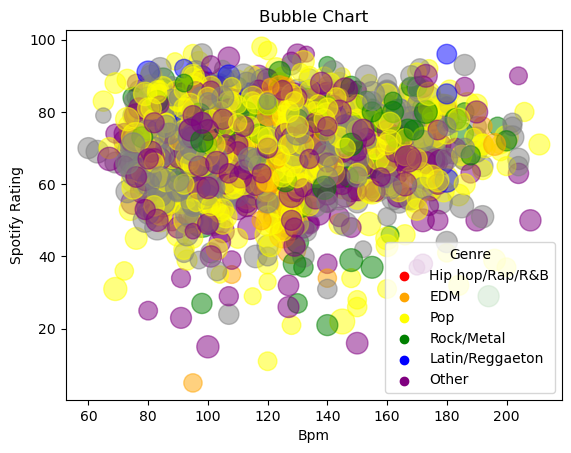

In [11]:
# Define the color mapping dictionary
color_mapping = {
    'Hip hop/Rap/R&B': 'red',
    'EDM': 'orange',
    'Pop': 'yellow',
    'Rock/Metal': 'green',
    'Latin/Reggaeton': 'blue',
    'Other': 'purple'
}

# Select the columns for the bubble chart
x = clean_spotify_df['Bpm']
y = clean_spotify_df['Spotify Rating']
size = clean_spotify_df['Duration (in seconds)']
genre = clean_spotify_df['Genre']

# Convert genre to colors based on the color mapping
colors = np.array([color_mapping.get(g, 'gray') for g in genre])

# Create the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=colors, s=size, alpha=0.5)

# Customize the plot
ax.set_xlabel('Bpm')
ax.set_ylabel('Spotify Rating')
ax.set_title('Bubble Chart')

# Add a legend
for genre, color in color_mapping.items():
    ax.scatter([], [], c=color, label=genre)

ax.legend(title='Genre')

# Show the plot
plt.show()

In [12]:
## Need to replace with API search based on Genre
genre_filter = clean_spotify_df[clean_spotify_df['Genre'] == 'Pop'].copy()
genre_filter.head()

,Title,Artist,Genre,Year,Bpm,Energy,Danceability,dB,Liveness,Valence,Duration (in seconds),Acousticness,Speechiness,Spotify Rating
0,#thatPOWER,will.i.am,Pop,2013,128,61,80,-6,7,40,280,0,6,68
1,(When You Gonna) Give It Up to Me (feat. Keyshia Cole) - Radio Version,Sean Paul,Pop,2006,96,76,71,-3,4,72,244,7,23,68
2,...Baby One More Time,Britney Spears,Pop,1999,93,70,76,-6,44,91,211,20,3,81
5,1 2 3 (feat. Jason Derulo & De La Ghetto),Sofía Reyes,Pop,2018,95,90,79,-3,5,79,202,17,6,72
6,1 2 Step (feat. Missy Elliott) - Main,Ciara,Pop,2005,113,50,94,-11,5,80,202,4,16,54


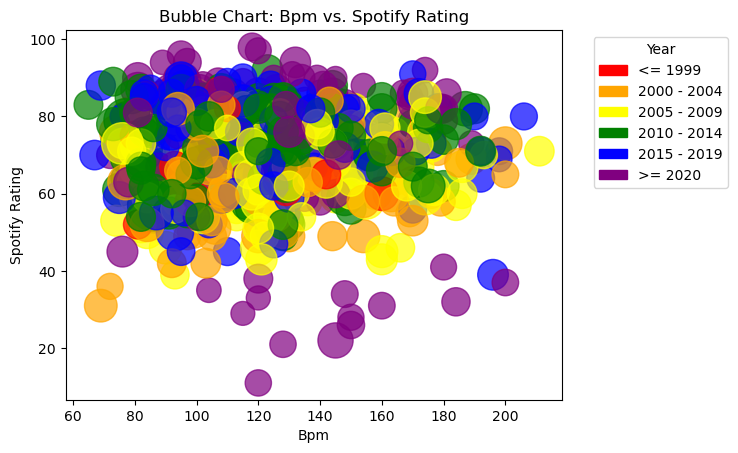

In [16]:
# Load the data from the "genre_filter" database
data = genre_filter

# Define the color map based on year ranges
def get_color(year):
    if year <= 1999:
        return 'red'
    elif 2000 <= year <= 2004:
        return 'orange'
    elif 2005 <= year <= 2009:
        return 'yellow'
    elif 2010 <= year <= 2014:
        return 'green'
    elif 2015 <= year <= 2019:
        return 'blue'
    elif year >= 2020:
        return 'purple'
    else:
        return 'black'

# Filter out the valid data points for plotting
valid_data = data.dropna(subset=['Bpm', 'Spotify Rating', 'Year'])

# Create the bubble chart
fig, ax = plt.subplots()

# Set the size of the bubbles based on the "Duration (in seconds)" column
sizes = valid_data['Duration (in seconds)'] *2

# Set the colors based on the "Year" column
colors = valid_data['Year'].apply(get_color)

# Plot the bubble chart
ax.scatter(valid_data['Bpm'], valid_data['Spotify Rating'], s=sizes, c=colors, alpha=0.7)

# Set the axis labels
ax.set_xlabel('Bpm')
ax.set_ylabel('Spotify Rating')

# Set the title
ax.set_title('Bubble Chart: Bpm vs. Spotify Rating')

# Create custom legend patches
legend_patches = [
    mpatches.Patch(color='red', label='<= 1999'),
    mpatches.Patch(color='orange', label='2000 - 2004'),
    mpatches.Patch(color='yellow', label='2005 - 2009'),
    mpatches.Patch(color='green', label='2010 - 2014'),
    mpatches.Patch(color='blue', label='2015 - 2019'),
    mpatches.Patch(color='purple', label='>= 2020'),
]

# Add the legend
ax.legend(handles=legend_patches, title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()